In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

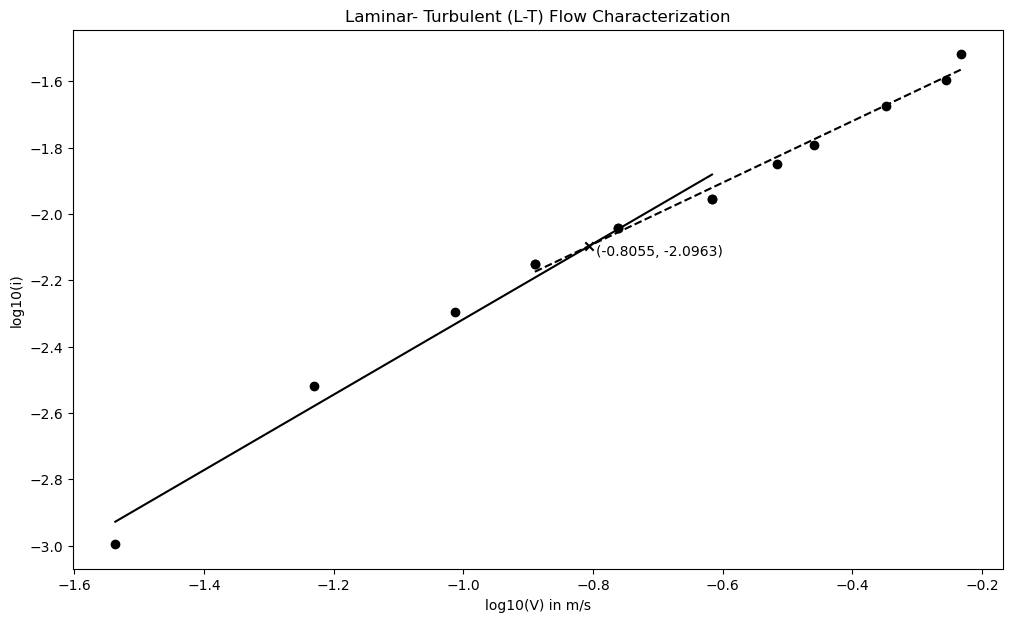

For laminar region: k=0.0660, n=1.1373
For turbulent region: k=0.0448, n=0.9275


In [2]:
import numpy as np
import matplotlib.pyplot as plt

i = np.array([0.001010101,
0.003030303,
0.005050505,
0.007070707,
0.009090909,
0.011111111,
0.014141414,
0.016161616,
0.021212121,
0.025252525,
0.03030303
])
V = np.array([0.029068177,
0.058962264,
0.097222222,
0.128935939,
0.173158409,
0.241851973,
0.304580897,
0.347787731,
0.448085358,
0.555715146,
0.584920247

])

log_i = np.log10(i)
log_V = np.log10(V)

# Separating the laminar and turbulent regions
laminar_i = log_i[:6]
laminar_V = log_V[:6]
turbulent_i = log_i[3:]
turbulent_V = log_V[3:]

# Fitting the lines
laminar_fit = np.polyfit(laminar_V,laminar_i,1)
turbulent_fit = np.polyfit(turbulent_V,turbulent_i,1)

# Calculating k and n for the two regions
n_laminar = laminar_fit[0]
k_laminar = 10**laminar_fit[1]
n_turbulent = turbulent_fit[0]
k_turbulent = 10**turbulent_fit[1]

# Finding the intersection point
intersection_x = (turbulent_fit[1]-laminar_fit[1])/(laminar_fit[0]-turbulent_fit[0])
intersection_y = laminar_fit[0]*intersection_x+laminar_fit[1]

# Plotting the data and the best-fit lines
plt.figure(figsize=(12,7))
plt.scatter(laminar_V,laminar_i, c='black')
plt.scatter(turbulent_V,turbulent_i,c='black')
plt.plot(laminar_V,laminar_fit[0]*laminar_V+laminar_fit[1],'k')
plt.plot(turbulent_V,turbulent_fit[0]*turbulent_V+turbulent_fit[1],'k--')
plt.scatter(intersection_x, intersection_y, c='black',marker='x')
plt.text(intersection_x+0.01, intersection_y-0.03,f'({intersection_x:.4f}, {intersection_y:.4f})')
plt.title("Laminar- Turbulent (L-T) Flow Characterization")
plt.xlabel('log10(V) in m/s')
plt.ylabel('log10(i)')

# saving the figure

plt.savefig("log10(i)-vs-log10(v).pdf")

# plotting the figure
plt.show()

print(f'For laminar region: k={k_laminar:.4f}, n={n_laminar:.4f}')
print(f'For turbulent region: k={k_turbulent:.4f}, n={n_turbulent:.4f}')


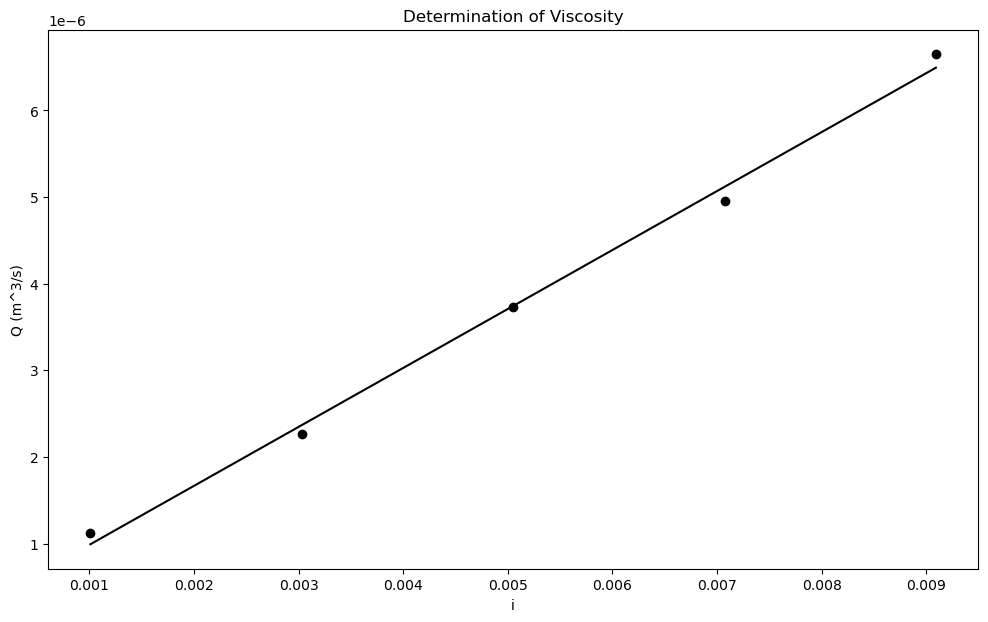

Point closest to the best-fit line among the first four points: (0.005050505, 3.73333e-06)
Value of Q at i = 0.003: 0.000002


In [3]:
Q = np.array([1.11622E-06,
2.26415E-06,
3.73333E-06,
4.95114E-06,
6.64928E-06,
9.28712E-06,
1.16959E-05,
1.3355E-05,
1.72065E-05,
2.13395E-05,
2.24609E-05
])

# Selecting the first five points
i_5 = i[:5]
Q_5 = Q[:5]

# Fitting the line
fit = np.polyfit(i_5,Q_5,1)

# Calculating Q at i = 0.003
Q_at_i_03 = fit[0]*0.003+fit[1]

# Plotting the data and the best-fit line
plt.figure(figsize=(12,7))
plt.scatter(i_5,Q_5, c='black')
plt.plot(i_5,fit[0]*i_5+fit[1],'k')
plt.title('Determination of Viscosity')
plt.xlabel('i')
plt.ylabel('Q (m^3/s)')

plt.show()

# Finding the point closest to the best-fit line among the first four points
distances = np.abs(Q[:4] - (fit[0]*i[:4]+fit[1]))/np.sqrt(fit[0]**2+1)
closest_point_index = np.argmin(distances)
print(f'Point closest to the best-fit line among the first four points: ({i[closest_point_index]}, {Q[closest_point_index]})')

print(f'Value of Q at i = 0.003: {Q_at_i_03:.6f}')

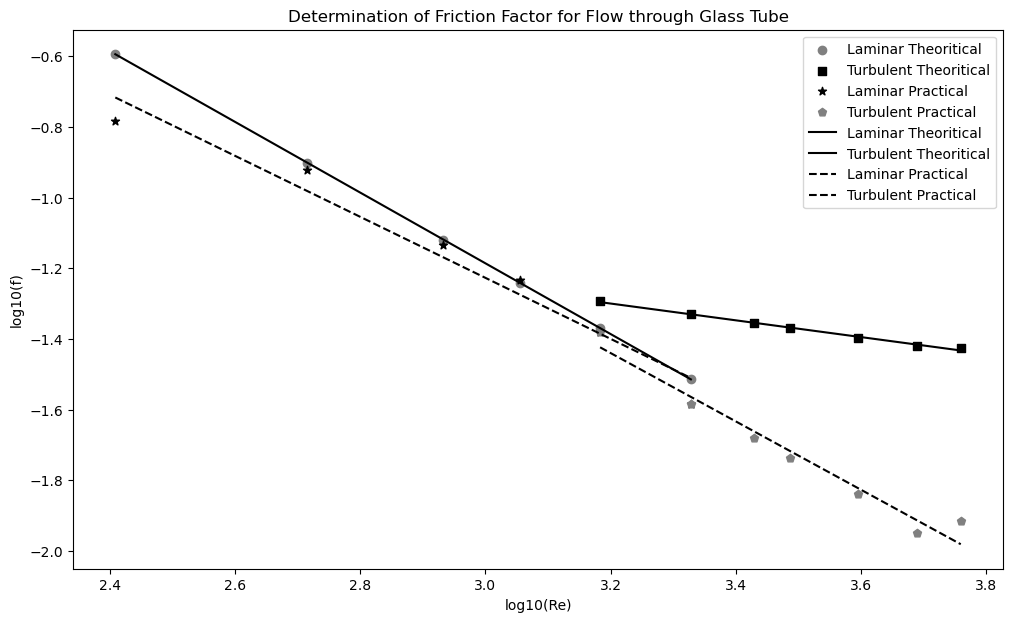

In [4]:
f_laminar_theoritical = np.array([0.25445598,
0.125445851,
0.07607902,
0.057366251,
0.042715635,
0.030583052
])
f_laminar_practical = np.array([0.164182272,
0.119711204,
0.073383896,
0.058413323,
0.04164062,
0.02608887
])
f_turbulent_theoritical = np.array([0.054746404,
0.050855532,
0.046780158,
0.044159427,
0.042718946,
0.040096725,
0.037995839,
0.037512407
])
f_turbulent_practical = np.array([0.058413323,
0.04164062,
0.02608887,
0.020935559,
0.018350729,
0.01450974,
0.011230456,
0.012164375
])
Re = np.array([256, 519.2, 856.1, 1135.4, 1524.8, 2129.7, 2682, 3062.5, 3945.7, 4893.4, 5750.6])

log_f_laminar_theoritical = np.log10(f_laminar_theoritical)
log_f_turbulent_theoritical = np.log10(f_turbulent_theoritical)
log_f_laminar_practical = np.log10(f_laminar_practical)
log_f_turbulent_practical = np.log10(f_turbulent_practical)
log_Re = np.log10(Re)

# Separating the laminar and turbulent regions
Re_laminar = log_Re[:6]
Re_turbulent = log_Re[4:]

# Fitting the lines
laminar_theoritical_fit = np.polyfit(Re_laminar,log_f_laminar_theoritical,1)
turbulent_theoritical_fit = np.polyfit(Re_turbulent,log_f_turbulent_theoritical[1:],1)
laminar_practical_fit = np.polyfit(Re_laminar,log_f_laminar_practical,1)
turbulent_practical_fit = np.polyfit(Re_turbulent,log_f_turbulent_practical[1:],1)

# Finding the intersection point
intersection_x_theoritical = (turbulent_theoritical_fit[1]-laminar_theoritical_fit[1])/(laminar_theoritical_fit[0]-turbulent_theoritical_fit[0])
intersection_y_theoritical = laminar_theoritical_fit[0]*intersection_x_theoritical+laminar_theoritical_fit[1]
intersection_x_practical = (turbulent_practical_fit[1]-laminar_practical_fit[1])/(laminar_practical_fit[0]-turbulent_practical_fit[0])
intersection_y_practical = laminar_practical_fit[0]*intersection_x_practical+laminar_practical_fit[1]

# Plotting the data and the best-fit lines
plt.figure(figsize=(12,7))
plt.scatter(Re_laminar,log_f_laminar_theoritical,c='gray',marker='o', label = 'Laminar Theoritical')
plt.scatter(Re_turbulent,log_f_turbulent_theoritical[1:],c='black',marker='s', label = 'Turbulent Theoritical')
plt.scatter(Re_laminar,log_f_laminar_practical,c='black',marker='*', label = 'Laminar Practical')
plt.scatter(Re_turbulent,log_f_turbulent_practical[1:],c='gray',marker='p', label = 'Turbulent Practical')
plt.plot(Re_laminar,laminar_theoritical_fit[0]*Re_laminar+laminar_theoritical_fit[1],'k', label = 'Laminar Theoritical')
plt.plot(Re_turbulent,turbulent_theoritical_fit[0]*Re_turbulent+turbulent_theoritical_fit[1],'k', label = 'Turbulent Theoritical')
plt.plot(Re_laminar,laminar_practical_fit[0]*Re_laminar+laminar_practical_fit[1],'k--', label = 'Laminar Practical')
plt.plot(Re_turbulent,turbulent_practical_fit[0]*Re_turbulent+turbulent_practical_fit[1],'k--', label = 'Turbulent Practical')
plt.title('Determination of Friction Factor for Flow through Glass Tube')
plt.xlabel('log10(Re)')
plt.ylabel('log10(f)')
plt.legend()
plt.show()

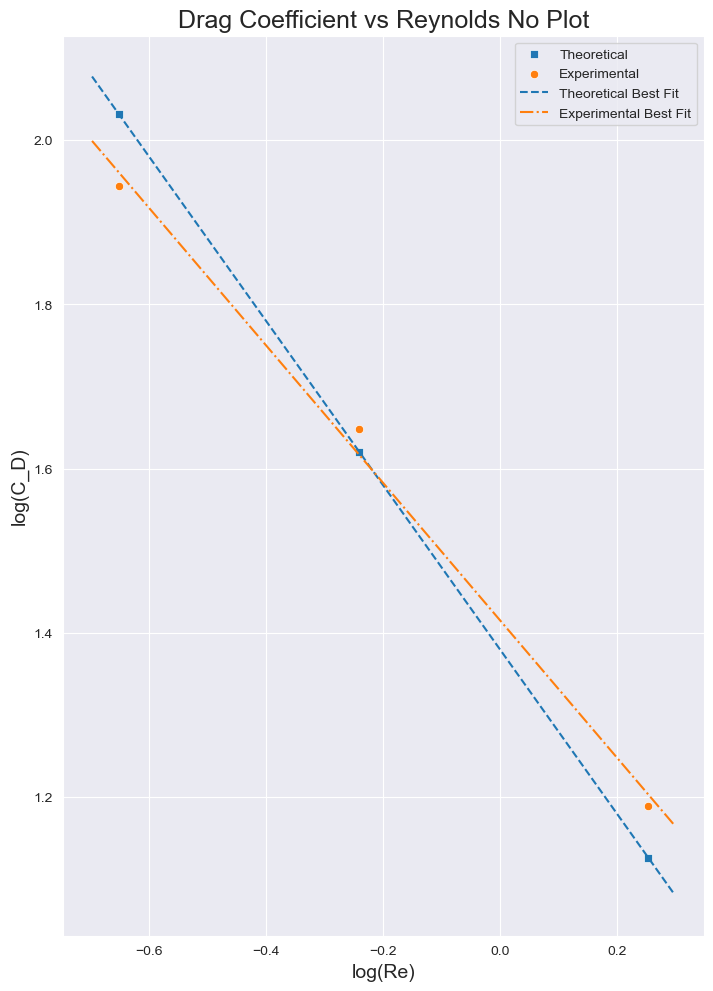

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

C_D_theoretical = [107.6598445,
41.69884349,
13.37629123
]
Re = [0.222924342,
0.575555531,
1.794219309
]
C_D_experiment = [87.84681084,
44.47749304,
15.4467632
]

# Convert data to log scale
log_Re = np.log10(Re)
log_C_D_theoretical = np.log10(C_D_theoretical)
log_C_D_experiment = np.log10(C_D_experiment)

# Create a DataFrame for seaborn
data = {'Re': log_Re,
        'C_D_theoretical': log_C_D_theoretical,
        'C_D_experiment': log_C_D_experiment}
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(8.27, 11.69))
sns.set_style('darkgrid')
sns.scatterplot(x='Re', y='C_D_theoretical', data=df, label='Theoretical', marker='s')
sns.scatterplot(x='Re', y='C_D_experiment', data=df, label='Experimental', marker='o')

# Calculate and plot the best-fit lines
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(log_Re, log_C_D_theoretical)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(log_Re, log_C_D_experiment)
x_vals = np.array(plt.gca().get_xlim())
y_vals1 = intercept1 + slope1 * x_vals
y_vals2 = intercept2 + slope2 * x_vals
plt.plot(x_vals,y_vals1,'--',label='Theoretical Best Fit')
plt.plot(x_vals,y_vals2,'-.',label='Experimental Best Fit')

plt.xlabel('log(Re)', fontsize=14)
plt.ylabel('log(C_D)', fontsize=14)
plt.title('Drag Coefficient vs Reynolds No Plot', fontsize=18)
plt.legend()
plt.show()

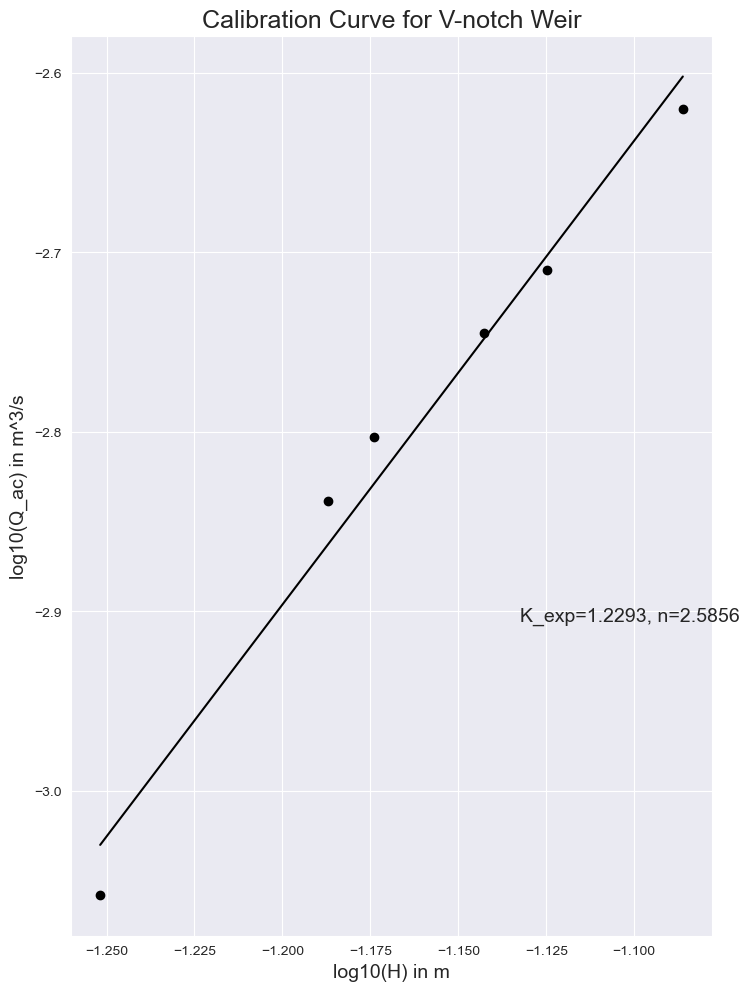

          Value of K_exp = 1.2293108854675845 and value of n = 2.5855518730453126


In [21]:
import numpy as np
import matplotlib.pyplot as plt

Q_ac = np.array([0.000875,
0.00145,
0.001575,
0.0018,
0.00195,
0.0024
])
H = np.array([0.056,
0.065,
0.067,
0.072,
0.075,
0.082,
])

log_Q_ac = np.log10(Q_ac)
log_H = np.log10(H)

# Use numpy's polyfit function to find the best fit line for log_H and log_Q_ac
n, log_K = np.polyfit(log_H, log_Q_ac, 1)

# Calculate K from log_K
K = np.exp(log_K)

# Plotting the data and the best-fit lines
plt.figure(figsize=(8.27, 11.69))
plt.scatter(log_H,log_Q_ac, c='black')
plt.plot(log_H, n*log_H + log_K, c='black')
plt.title("Calibration Curve for V-notch Weir", fontsize=18)
plt.xlabel('log10(H) in m', fontsize=14)
plt.ylabel('log10(Q_ac) in m^3/s', fontsize=14)
plt.text(0.7, 0.35, f'K_exp={K_exp:.4f}, n={n:.4f}', transform=plt.gca().transAxes, fontsize=14)
plt.show()
print(f'          Value of K_exp = {K} and value of n = {n}');

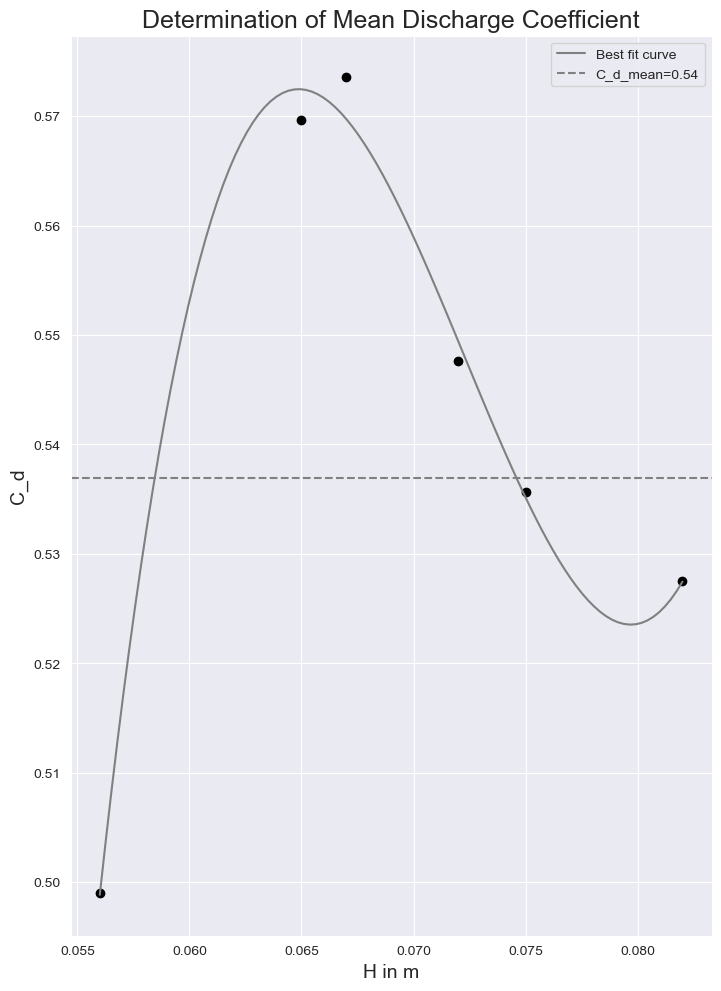

In [7]:
from numpy.polynomial.polynomial import polyfit

# Given data
C_d = np.array([0.498969803,
0.569666773,
0.573627323,
0.547617783,
0.535695171,
0.52748837
])

# Calculate the error for polynomials of degree up to 6
max_degree = 3
errors = []
for degree in range(1, max_degree+1):
    coefficients = polyfit(H, C_d, degree)
    C_d_fit = np.polyval(coefficients[::-1], H)
    error = np.sum((C_d - C_d_fit)**2)
    errors.append(error)

# Find the degree with the least error
best_degree = np.argmin(errors) + 1

# Use numpy's polyfit function to find the best fit curve for H and C_d with the best degree
coefficients = polyfit(H, C_d, best_degree)

# Generate a continuous best fit curve
H_continuous = np.linspace(H[0], H[-1], 100)
C_d_fit_continuous = np.polyval(coefficients[::-1], H_continuous)

# Calculate C_d_mean
C_d_mean = np.mean(C_d[(H >= H[-3]) & (H <= H[-1])])

# Plot the data and the best fit curve
plt.figure(figsize=(8.27, 11.69))
plt.plot(H, C_d, 'o',color='black')
plt.plot(H_continuous, C_d_fit_continuous, label=f'Best fit curve', color='gray')
plt.axhline(C_d_mean, linestyle='--', label=f'C_d_mean={C_d_mean:.2f}', color='gray')
plt.xlabel('H in m', fontsize=14)
plt.ylabel('C_d', fontsize=14)
plt.title('Determination of Mean Discharge Coefficient', fontsize=18)
plt.legend()
plt.show()

C:\Users\rahul\Desktop\sample_project_1\env\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\rahul\Desktop\sample_project_1\env\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\rahul\Desktop\sample_project_1\env\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


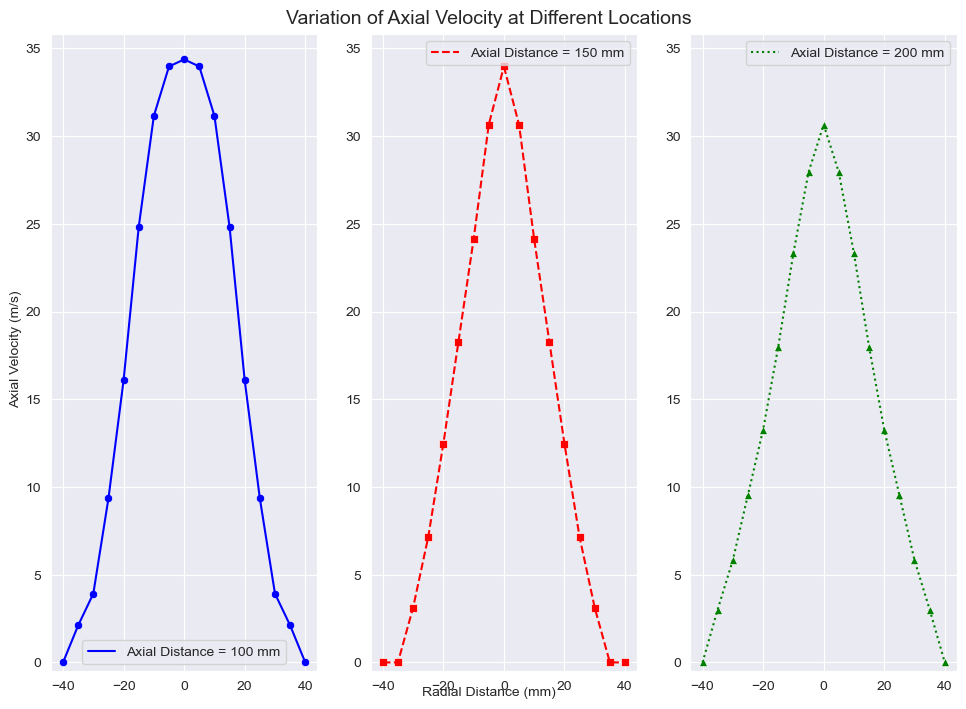

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

r = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40])
V_a_100 = np.array([34.373941,
33.97190661,
31.15766582,
24.82562406,
16.08137591,
9.347299747,
3.919835378,
2.110680588,
0
])
V_a_150 = np.array([33.97190661,
30.65512282,
24.12206386,
18.2925651,
12.46306633,
7.136110559,
3.115766582,
0,
0                  
])
V_a_200 = np.array([30.65512282,
27.94139064,
23.31799507,
17.9910393,
13.26713512,
9.548316945,
5.829498767,
3.015257983,
0
])

# Fit a polynomial for each axial distance
z1 = np.polyfit(r, V_a_100, 9)
z2 = np.polyfit(r, V_a_150, 9)
z3 = np.polyfit(r, V_a_200, 9)

p1 = np.poly1d(z1)
p2 = np.poly1d(z2)
p3 = np.poly1d(z3)

# Create a custom layout for the subplots using gridspec
fig = plt.figure(figsize=(11.69, 8.27))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharey=ax1)
ax3 = plt.subplot(gs[2], sharey=ax1)

# Plot the data and the fitted polynomials using Seaborn
sns.set_style('darkgrid')
sns.scatterplot(x=r, y=V_a_100, color='blue', marker='o', ax=ax1)
sns.lineplot(x=r, y=p1(r), color='blue', linestyle='-', ax=ax1, label='Axial Distance = 100 mm')
sns.scatterplot(x=-r, y=V_a_100, color='blue', marker='o', ax=ax1)
sns.lineplot(x=-r, y=p1(r), color='blue', linestyle='-', ax=ax1)
sns.scatterplot(x=r, y=V_a_150, color='red', marker='s', ax=ax2)
sns.lineplot(x=r, y=p2(r), color='red', linestyle='--', ax=ax2, label='Axial Distance = 150 mm')
sns.scatterplot(x=-r, y=V_a_150, color='red', marker='s', ax=ax2)
sns.lineplot(x=-r, y=p2(r), color='red', linestyle='--', ax=ax2)
sns.scatterplot(x=r, y=V_a_200, color='green', marker='^', ax=ax3)
sns.lineplot(x=r, y=p3(r), color='green', linestyle=':', ax=ax3, label='Axial Distance = 200 mm')
sns.scatterplot(x=-r, y=V_a_200, color='green', marker='^', ax=ax3)
sns.lineplot(x=-r, y=p3(r), color='green', linestyle=':', ax=ax3)

# Set the same y-axis limits for all subplots
for ax in [ax1,ax2,ax3]:
    ax.set_ylim(-0.5, 35.8)

# Show only one y-axis label for all three curves
fig.text(0.09, 0.5, 'Axial Velocity (m/s)', va='center', rotation='vertical', fontsize=10)

# Set a common xlabel for all three subplots
fig.text(0.5, 0.08, 'Radial Distance (mm)', ha='center', fontsize=10)

# Add a common title to the figure
fig.suptitle('Variation of Axial Velocity at Different Locations', x=0.5, y=0.91, fontsize=14)

plt.show()

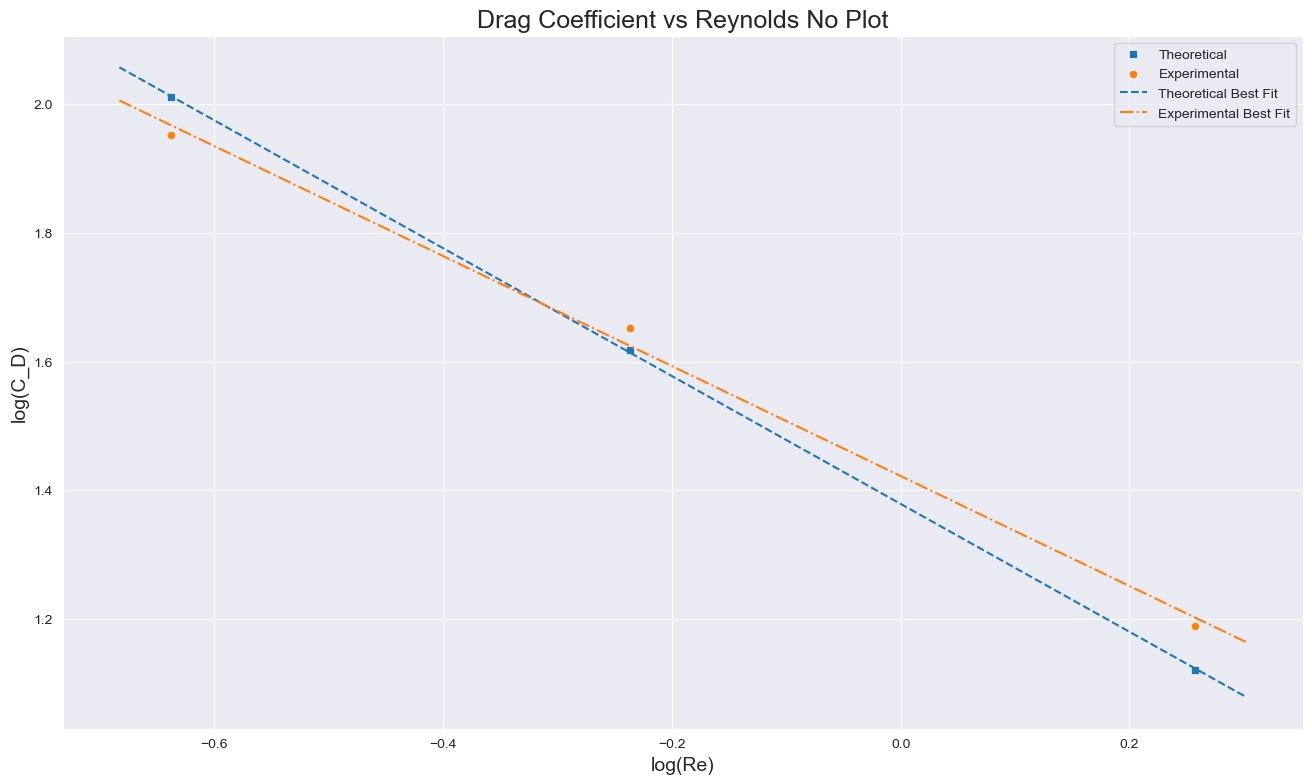

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

C_D_theoretical = [102.57,41.43,13.23]
Re = [0.23,0.58,1.81]
C_D_experiment = [89.52,44.95,15.47]

# Convert data to log scale
log_Re = np.log10(Re)
log_C_D_theoretical = np.log10(C_D_theoretical)
log_C_D_experiment = np.log10(C_D_experiment)

# Create a DataFrame for seaborn
data = {'Re': log_Re,
        'C_D_theoretical': log_C_D_theoretical,
        'C_D_experiment': log_C_D_experiment}
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(16,9))
sns.set_style('darkgrid')
sns.scatterplot(x='Re', y='C_D_theoretical', data=df, label='Theoretical', marker='s')
sns.scatterplot(x='Re', y='C_D_experiment', data=df, label='Experimental', marker='o')

# Calculate and plot the best-fit lines
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(log_Re, log_C_D_theoretical)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(log_Re, log_C_D_experiment)
x_vals = np.array(plt.gca().get_xlim())
y_vals1 = intercept1 + slope1 * x_vals
y_vals2 = intercept2 + slope2 * x_vals
plt.plot(x_vals,y_vals1,'--',label='Theoretical Best Fit')
plt.plot(x_vals,y_vals2,'-.',label='Experimental Best Fit')

plt.xlabel('log(Re)', fontsize=14)
plt.ylabel('log(C_D)', fontsize=14)
plt.title('Drag Coefficient vs Reynolds No Plot', fontsize=18)
plt.legend()
plt.show()

1.216940412945214


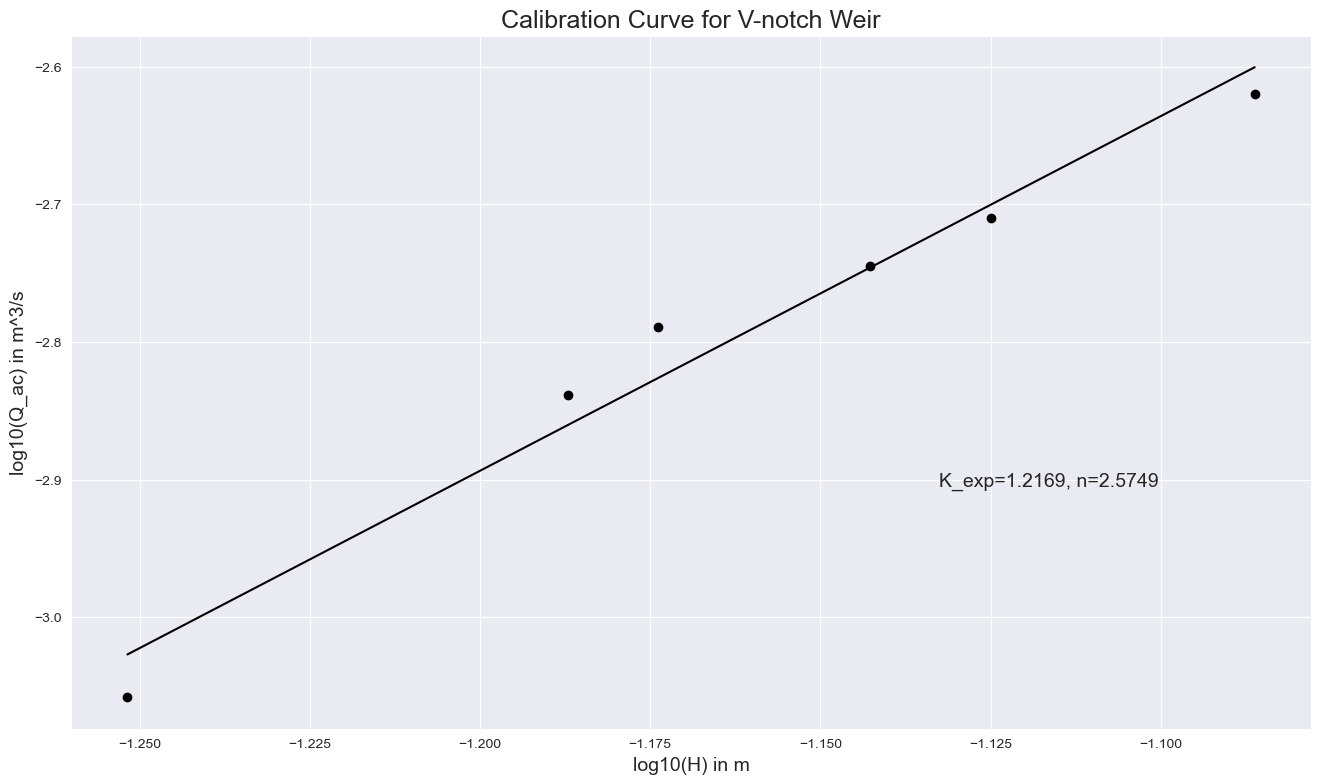

In [16]:
import numpy as np
import matplotlib.pyplot as plt

Q_ac = np.array([0.000875, 0.00145, 0.001625, 0.0018, 0.00195, 0.0024])
H = np.array([0.056, 0.065, 0.067, 0.072, 0.075, 0.082])

log_Q_ac = np.log10(Q_ac)
log_H = np.log10(H)

# Use numpy's polyfit function to find the best fit line for log_H and log_Q_ac
n, log_K = np.polyfit(log_H, log_Q_ac, 1)

# Calculate K from log_K
K_exp = np.exp(log_K)
# Plotting the data and the best-fit lines
plt.figure(figsize=(16,9))
plt.scatter(log_H,log_Q_ac, c='black')
plt.plot(log_H, n*log_H + log_K, c='black')
plt.title("Calibration Curve for V-notch Weir", fontsize=18)
plt.xlabel('log10(H) in m', fontsize=14)
plt.ylabel('log10(Q_ac) in m^3/s', fontsize=14)
plt.text(0.7, 0.35, f'K_exp={K_exp:.4f}, n={n:.4f}', transform=plt.gca().transAxes, fontsize=14)
plt.show()


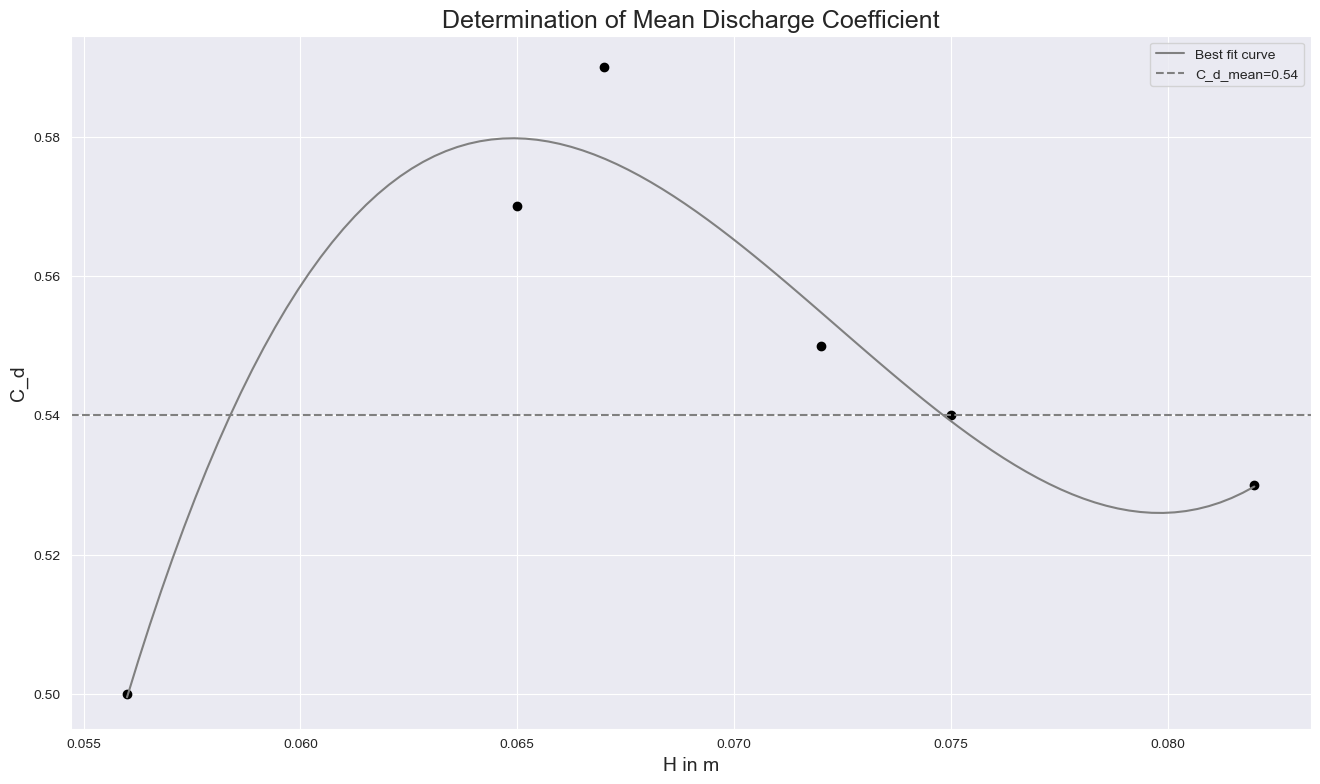

In [11]:
from numpy.polynomial.polynomial import polyfit

# Given data
C_d = np.array([0.5, 0.57, 0.59, 0.55, 0.54, 0.53])

# Calculate the error for polynomials of degree up to 6
max_degree = 3
errors = []
for degree in range(1, max_degree+1):
    coefficients = polyfit(H, C_d, degree)
    C_d_fit = np.polyval(coefficients[::-1], H)
    error = np.sum((C_d - C_d_fit)**2)
    errors.append(error)

# Find the degree with the least error
best_degree = np.argmin(errors) + 1

# Use numpy's polyfit function to find the best fit curve for H and C_d with the best degree
coefficients = polyfit(H, C_d, best_degree)

# Generate a continuous best fit curve
H_continuous = np.linspace(H[0], H[-1], 100)
C_d_fit_continuous = np.polyval(coefficients[::-1], H_continuous)

# Calculate C_d_mean
C_d_mean = np.mean(C_d[(H >= H[-3]) & (H <= H[-1])])

# Plot the data and the best fit curve
plt.figure(figsize=(16,9))
plt.plot(H, C_d, 'o',color='black')
plt.plot(H_continuous, C_d_fit_continuous, label=f'Best fit curve', color='gray')
plt.axhline(C_d_mean, linestyle='--', label=f'C_d_mean={C_d_mean:.2f}', color='gray')
plt.xlabel('H in m', fontsize=14)
plt.ylabel('C_d', fontsize=14)
plt.title('Determination of Mean Discharge Coefficient', fontsize=18)
plt.legend()
plt.show()

C:\Users\rahul\Desktop\sample_project_1\env\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\rahul\Desktop\sample_project_1\env\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\rahul\Desktop\sample_project_1\env\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


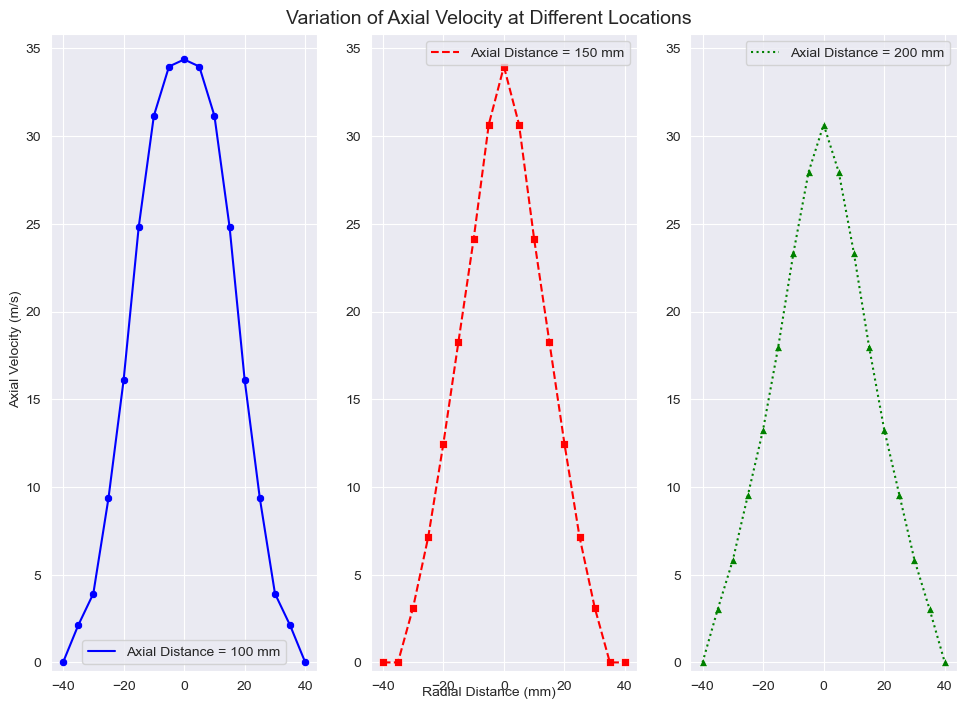

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

r = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40])
V_a_100 = np.array([34.37, 33.97, 31.16, 24.83, 16.08, 9.35, 3.92, 2.11, 0])
V_a_150 = np.array([33.97, 30.66, 24.12, 18.29, 12.46, 7.14, 3.12, 0, 0])
V_a_200 = np.array([30.66, 27.94, 23.32, 17.99, 13.27, 9.55, 5.83, 3.02, 0])

# Fit a polynomial for each axial distance
z1 = np.polyfit(r, V_a_100, 9)
z2 = np.polyfit(r, V_a_150, 9)
z3 = np.polyfit(r, V_a_200, 9)

p1 = np.poly1d(z1)
p2 = np.poly1d(z2)
p3 = np.poly1d(z3)

# Create a custom layout for the subplots using gridspec
fig = plt.figure(figsize=(11.69, 8.27))
gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharey=ax1)
ax3 = plt.subplot(gs[2], sharey=ax1)

# Plot the data and the fitted polynomials using Seaborn
sns.set_style('darkgrid')
sns.scatterplot(x=r, y=V_a_100, color='blue', marker='o', ax=ax1)
sns.lineplot(x=r, y=p1(r), color='blue', linestyle='-', ax=ax1, label='Axial Distance = 100 mm')
sns.scatterplot(x=-r, y=V_a_100, color='blue', marker='o', ax=ax1)
sns.lineplot(x=-r, y=p1(r), color='blue', linestyle='-', ax=ax1)
sns.scatterplot(x=r, y=V_a_150, color='red', marker='s', ax=ax2)
sns.lineplot(x=r, y=p2(r), color='red', linestyle='--', ax=ax2, label='Axial Distance = 150 mm')
sns.scatterplot(x=-r, y=V_a_150, color='red', marker='s', ax=ax2)
sns.lineplot(x=-r, y=p2(r), color='red', linestyle='--', ax=ax2)
sns.scatterplot(x=r, y=V_a_200, color='green', marker='^', ax=ax3)
sns.lineplot(x=r, y=p3(r), color='green', linestyle=':', ax=ax3, label='Axial Distance = 200 mm')
sns.scatterplot(x=-r, y=V_a_200, color='green', marker='^', ax=ax3)
sns.lineplot(x=-r, y=p3(r), color='green', linestyle=':', ax=ax3)

# Set the same y-axis limits for all subplots
for ax in [ax1,ax2,ax3]:
    ax.set_ylim(-0.5, 35.8)

# Show only one y-axis label for all three curves
fig.text(0.09, 0.5, 'Axial Velocity (m/s)', va='center', rotation='vertical', fontsize=10)

# Set a common xlabel for all three subplots
fig.text(0.5, 0.08, 'Radial Distance (mm)', ha='center', fontsize=10)

# Add a common title to the figure
fig.suptitle('Variation of Axial Velocity at Different Locations', x=0.5, y=0.91, fontsize=14)

plt.show()


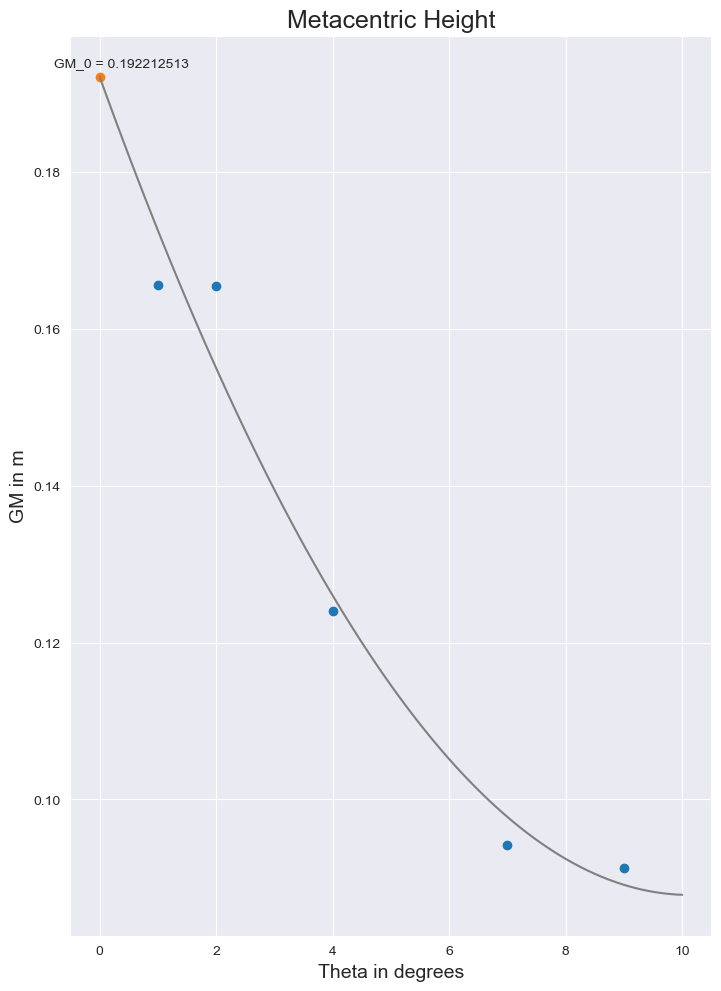

In [15]:
import numpy as np
import matplotlib.pyplot as plt

Theta = np.array([1, 2, 4, 7, 9])
GM = np.array([0.165588297,
0.165537897,
0.124002176,
0.094160661,
0.09124566
])

# Fit a polynomial of degree 2
coefficients = np.polyfit(Theta, GM, 2)
p = np.poly1d(coefficients)

# Plot the data points and the best fit curve
plt.figure(figsize=(8.27, 11.69))
plt.scatter(Theta, GM)
xp = np.linspace(0, 10, 100)
plt.plot(xp, p(xp), c='gray')

# Calculate the y-intercept
y_intercept = p(0)

# Plot the y-intercept
plt.scatter(0, y_intercept)
plt.annotate(f" GM_0 = {y_intercept:.9f}", (0, y_intercept), textcoords="offset points", xytext=(14,7), ha='center')

# Show the plot
plt.xlabel('Theta in degrees', fontsize=14)
plt.ylabel('GM in m', fontsize=14)
plt.title('Metacentric Height', fontsize=18)
plt.show()